***BỘ DỮ LIỆU***

**Ecommerce Profit Analysis**

Bộ dữ liệu này giúp doanh nghiệp thương mại điện tử hiểu rõ hiệu quả bán hàng và lợi nhuận theo nhiều chiều khác nhau, từ đó đưa ra các quyết định kinh doanh chính xác hơn.

**Thông tin về dataset**

Sale Report.csv: chứa 9234 dòng và 7 cột, theo dõi tồn kho, phân tích theo danh mục sản phẩm.\
	
P L March 2021.csv: chứa 1329 dòng và 17 cột, dùng để so sánh giá giữa các nền tảng, phân tích lợi nhuận, chiết khấu\

May-2022.csv: chứa 1329 dòng và 16 cột, tương tự với file P&L nhưng cho thời gian tháng 5/2022\

International sale Report.csv: chứa 37431 dòng và 9 cột, dùng để phân tích doanh số quốc tế, theo dõi doanh thu theo khách hàng/kiểu dáng/thời gian.\

Expense GGIF.csv: chứa 16 dòng và 4 cột, có lẽ bộ data này đang bị lỗi nên chưa thể xác định với các cột unnamed, dự đoán ban đầu có thể là tổng doanh thu từ các sản phẩm\

Cloud Warehouse Compersion Chart.csv: chứa 49 dòng và 3 cột\

Amazon Sale Report.csv: chứa 128976 dòng và 23 cột, trong đó có một cột unnamed bị lỗi, 

**Nhận xét ban đầu về bộ dữ liệu**

Bộ dữ liệu có tính ứng dụng cao trong lĩnh vực bán lẻ trực tuyến (e-commerce) và tối ưu hóa lợi nhuận đa kênh. Dữ liệu phản ánh các khía cạnh thiết yếu trong vận hành và phân phối sản phẩm, từ giá bán, tồn kho, đến doanh số thực tế trên các nền tảng khác nhau như Amazon, Myntra, Flipkart…

✅ Điểm mạnh:\
	•	Phân mảnh chi tiết theo từng nền tảng thương mại điện tử giúp phân tích hiệu quả kênh bán hàng.\
	•	Có thông tin về MRP (giá niêm yết), giá bán cuối cùng và mức chiết khấu, giúp đo lường mức độ lợi nhuận và chiến lược giá.\
	•	Dữ liệu lịch sử doanh số theo ngày (đặc biệt từ file Amazon Sale Report và International Sale Report) giúp phân tích theo thời gian và xu hướng.\
	•	Dữ liệu tồn kho và SKU cụ thể cho phép phân tích hiệu quả danh mục sản phẩm và tồn kho.\

⚠️ Hạn chế:\
	•	Một số file như Expense IIGF.csv bị lỗi định dạng hoặc không rõ cấu trúc dữ liệu ban đầu → cần xử lý kỹ trước khi phân tích.\
	•	Thiếu cột thời gian trong một số bảng như Sale Report.csv hoặc P & L March 2021.csv, gây khó khăn nếu muốn phân tích xu hướng hoặc kết nối với dữ liệu doanh số.\
	•	Một số bảng không có mã liên kết rõ ràng (primary key) giữa các bảng → cần xử lý cẩn thận để tránh join sai dữ liệu.\
	•	Không có thông tin rõ ràng về chi phí logistics, marketing, nên việc phân tích lợi nhuận thuần có thể bị hạn chế nếu chỉ dùng dữ liệu hiện tại.\



🔍 Cơ hội phân tích:\
	•	Phân tích so sánh lợi nhuận giữa các nền tảng TMĐT khác nhau → hỗ trợ ra quyết định ưu tiên kênh phân phối.\
	•	Phân tích hiệu quả sản phẩm theo SKU, kích thước, màu sắc và loại → tối ưu danh mục sản phẩm.\
	•	Kết hợp dữ liệu tồn kho và doanh số để đưa ra gợi ý bổ sung hàng và dự báo nhu cầu.\
	•	Xây dựng dashboard tương tác bằng Tableau để hỗ trợ báo cáo quản lý hiệu quả.

****IMPORT CÁC THƯ VIỆN CẦN THIẾT****

In [80]:
# Các thư viện cơ bản
import pandas as pd
import numpy as np

# Trực quan hoá dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Xử lí thời gian và dữ liệu 
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

# Thư viện xử lí dữ liệu
import os
import sys
import time



**Import các bộ data**

In [81]:
df_amazon_sale = pd.read_csv('../data/raw/Amazon Sale Report.csv')
df_international = pd.read_csv('../data/raw/International Sale Report.csv')
df_expense = pd.read_csv('../data/raw/Expense IIGF.csv')
df_sale = pd.read_csv('../data/raw/Sale Report.csv')
df_pl_may2022 = pd.read_csv('../data/raw/May-2022.csv')
df_cw_comparison = pd.read_csv('../data/raw/Cloud Warehouse Compersion Chart.csv')
df_pl_march2021 = pd.read_csv('../data/raw/P  L March 2021.csv')


/var/folders/06/55ncynjj69l30_gnnsnw6xv40000gn/T/ipykernel_98777/2743413218.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_amazon_sale = pd.read_csv('../data/raw/Amazon Sale Report.csv')


In [82]:
print(df_amazon_sale.info())
df_amazon_sale.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


Cột Unnamed: 22 chắc chắn là rác

In [83]:
print(df_cw_comparison.info())
df_cw_comparison.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       50 non-null     int64 
 1   Shiprocket  21 non-null     object
 2   Unnamed: 1  41 non-null     object
 3   INCREFF     28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB
None


,index,Shiprocket,Unnamed: 1,INCREFF
0,0,Heads,Price (Per Unit),Price (Per Unit)
1,1,Inbound (Fresh Stock and RTO),₹4.00,4
2,2,Outbound,₹7.00,11
3,3,Storage Fee/Cft,₹25.00,Rs 0.15/- Per Day
4,4,Customer Return with Detailed QC,₹6.00,15.5


In [84]:
print(df_expense.info())
df_expense.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           17 non-null     int64 
 1   Recived Amount  6 non-null      object
 2   Unnamed: 1      6 non-null      object
 3   Expance         15 non-null     object
 4   Unnamed: 3      17 non-null     object
dtypes: int64(1), object(4)
memory usage: 812.0+ bytes
None


,index,Recived Amount,Unnamed: 1,Expance,Unnamed: 3
0,0,Particular,Amount,Particular,Amount
1,1,06-19-22,1000,Large Bag,380
2,2,06-20-22,1500,"Stationary(Soft Pin, Paper pin for Dupatta, Fe...",170
3,3,06-22-22,500,OLA,839
4,4,06-23-22,2000,Auto Rent,520


In [85]:
print(df_international.info())
df_international.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37432 entries, 0 to 37431
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      37432 non-null  int64 
 1   DATE       37431 non-null  object
 2   Months     37407 non-null  object
 3   CUSTOMER   36392 non-null  object
 4   Style      36392 non-null  object
 5   SKU        34958 non-null  object
 6   Size       36392 non-null  object
 7   PCS        36392 non-null  object
 8   RATE       36392 non-null  object
 9   GROSS AMT  36392 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.9+ MB
None


,index,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
0,0,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.00,616.56,617.00
1,1,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.00,616.56,617.00
2,2,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.00,616.56,617.00
3,3,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.00,616.56,617.00
4,4,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.00,616.56,617.00


In [86]:
print(df_sale.info())
df_sale.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271 entries, 0 to 9270
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       9271 non-null   int64  
 1   SKU Code    9188 non-null   object 
 2   Design No.  9235 non-null   object 
 3   Stock       9235 non-null   float64
 4   Category    9226 non-null   object 
 5   Size        9235 non-null   object 
 6   Color       9226 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 507.1+ KB
None


,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


In [87]:
print(df_pl_march2021.info())
df_pl_march2021.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           1330 non-null   int64 
 1   Sku             1330 non-null   object
 2   Style Id        1330 non-null   object
 3   Catalog         1330 non-null   object
 4   Category        1330 non-null   object
 5   Weight          1330 non-null   object
 6   TP 1            1330 non-null   object
 7   TP 2            1330 non-null   object
 8   MRP Old         1330 non-null   object
 9   Final MRP Old   1330 non-null   object
 10  Ajio MRP        1330 non-null   object
 11  Amazon MRP      1330 non-null   object
 12  Amazon FBA MRP  1330 non-null   object
 13  Flipkart MRP    1330 non-null   object
 14  Limeroad MRP    1330 non-null   object
 15  Myntra MRP      1330 non-null   object
 16  Paytm MRP       1330 non-null   object
 17  Snapdeal MRP    1330 non-null   object
dtypes: int64

,index,Sku,Style Id,Catalog,Category,Weight,TP 1,TP 2,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


In [88]:
print(df_pl_may2022.info())
df_pl_may2022.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           1330 non-null   int64 
 1   Sku             1330 non-null   object
 2   Style Id        1330 non-null   object
 3   Catalog         1330 non-null   object
 4   Category        1330 non-null   object
 5   Weight          1330 non-null   object
 6   TP              1330 non-null   object
 7   MRP Old         1330 non-null   object
 8   Final MRP Old   1330 non-null   object
 9   Ajio MRP        1330 non-null   object
 10  Amazon MRP      1330 non-null   object
 11  Amazon FBA MRP  1330 non-null   object
 12  Flipkart MRP    1330 non-null   object
 13  Limeroad MRP    1330 non-null   object
 14  Myntra MRP      1330 non-null   object
 15  Paytm MRP       1330 non-null   object
 16  Snapdeal MRP    1330 non-null   object
dtypes: int64(1), object(16)
memory usage: 176.8+ KB
None

,index,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


Ta tiến hành loại bỏ các cột index

In [89]:
dfs = {
    "df_amazon_sale": df_amazon_sale,
    "df_international": df_international,
    "df_expense": df_expense,
    "df_sale": df_sale,
    "df_pl_march2021": df_pl_march2021,
    "df_pl_may2022": df_pl_may2022,
    "df_cw_comparison": df_cw_comparison
}

for name, df in dfs.items():
    if 'index' in df.columns:
        dfs[name] = df.drop(columns=['index'])

df_amazon_sale = dfs["df_amazon_sale"]
df_international = dfs["df_international"]
df_expense = dfs["df_expense"]
df_sale = dfs["df_sale"]
df_pl_march2021 = dfs["df_pl_march2021"]
df_pl_may2022 = dfs["df_pl_may2022"]
df_cw_comparison = dfs["df_cw_comparison"]

In [90]:
df_cw_comparison.head() 

,Shiprocket,Unnamed: 1,INCREFF
0,Heads,Price (Per Unit),Price (Per Unit)
1,Inbound (Fresh Stock and RTO),₹4.00,4
2,Outbound,₹7.00,11
3,Storage Fee/Cft,₹25.00,Rs 0.15/- Per Day
4,Customer Return with Detailed QC,₹6.00,15.5


****Initial EDA****

Category: ['Set' 'kurta' 'Western Dress' 'Top' 'Ethnic Dress'] ... (9 giá trị)
Size: ['S' '3XL' 'XL' 'L' 'XXL'] ... (11 giá trị)
Status: ['Cancelled' 'Shipped - Delivered to Buyer' 'Shipped'
 'Shipped - Returned to Seller' 'Shipped - Rejected by Buyer'] ... (13 giá trị)
Fulfilment: ['Merchant' 'Amazon'] ... (2 giá trị)
Courier Status: [nan 'Shipped' 'Cancelled' 'Unshipped'] ... (3 giá trị)
currency: ['INR' nan] ... (1 giá trị)


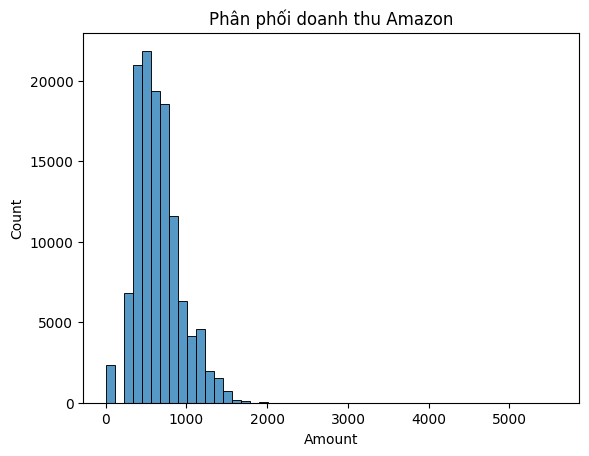

/var/folders/06/55ncynjj69l30_gnnsnw6xv40000gn/T/ipykernel_98777/273717920.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


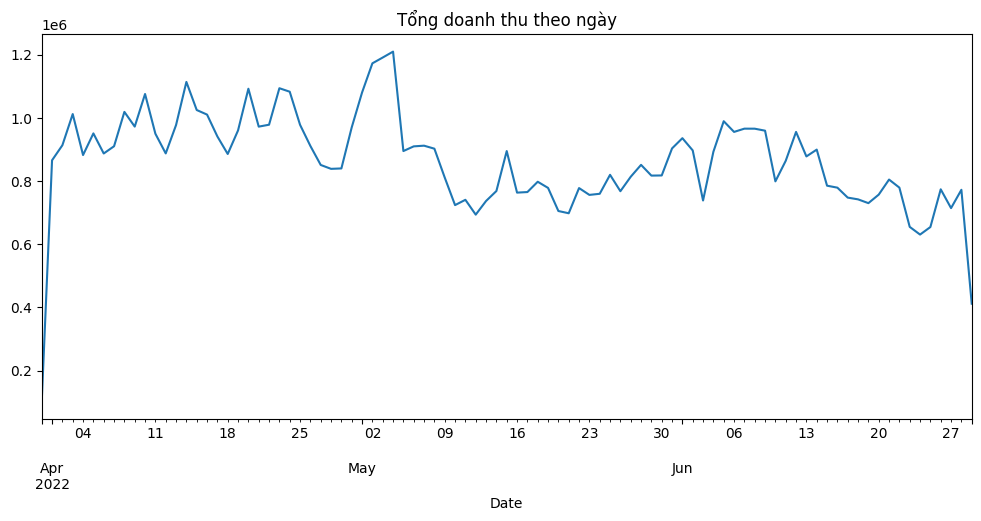

In [91]:
# 3. Các giá trị duy nhất
for col in ['Category', 'Size', 'Status', 'Fulfilment', 'Courier Status', 'currency']:
    print(f"{col}: {df_amazon_sale[col].unique()[:5]} ... ({df_amazon_sale[col].nunique()} giá trị)")

# 4. Phân phối doanh thu
sns.histplot(df_amazon_sale['Amount'], bins=50)
plt.title('Phân phối doanh thu Amazon')
plt.show()

# 5. Doanh thu theo ngày
df = df_amazon_sale.copy()
df['Date'] = pd.to_datetime(df['Date'])
df.groupby('Date')['Amount'].sum().plot(figsize=(12,5), title='Tổng doanh thu theo ngày')
plt.show()

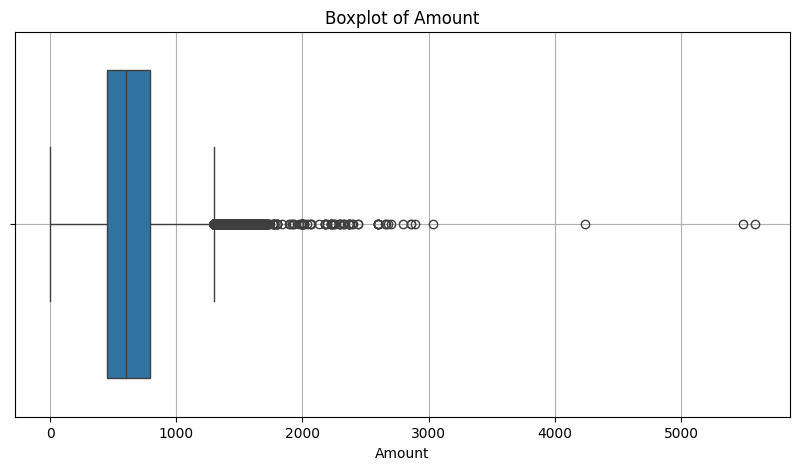

In [92]:
# Loại bỏ các giá trị null trong cột 'Amount'
df_clean = df_amazon_sale[df_amazon_sale['Amount'].notnull()]

# Vẽ boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_clean['Amount'])
plt.title('Boxplot of Amount')
plt.xlabel('Amount')
plt.grid(True)
plt.show()

✅ 1. Phần chính giữa (hộp)\
	•	Chiều dài hộp đại diện cho khoảng giữa Q1 (25%) đến Q3 (75%) – tức là 50% dữ liệu nằm trong khoảng này.\
	•	Đường kẻ giữa hộp (median): Là giá trị trung vị của cột Amount, có vẻ khoảng 600–700, khá khớp với median đã phân tích ở trên.

⚠️ 2. Râu (whiskers) và outliers\
	•	Râu trái (bên trái hộp): Kéo dài gần sát 0, nghĩa là có một số đơn hàng có Amount rất thấp.\
	•	Râu phải ngắn, nhưng sau đó có rất nhiều dấu tròn – outliers xuất hiện.

📌 Các điểm outlier bên phải\
	•	Đây là các đơn hàng có giá trị cao bất thường, nhiều giá trị trên 1500, 2000, thậm chí gần 5000–5500.\
	•	Điều này không nhất thiết là lỗi, có thể là các đơn hàng số lượng lớn hoặc sản phẩm cao cấp.\
	•	Tuy nhiên, cần kiểm tra thủ công xem các Amount này có hợp lý không (ví dụ: kết hợp với Qty để tính đơn giá).

📉 3. Phân phối lệch phải (right-skewed)\
	•	Vì có quá nhiều outliers ở phía giá trị cao, nên biểu đồ cho thấy dữ liệu bị lệch phải.\
	•	Điều này thường xảy ra với dữ liệu tài chính – hầu hết đơn hàng nhỏ, chỉ một số ít là rất lớn.


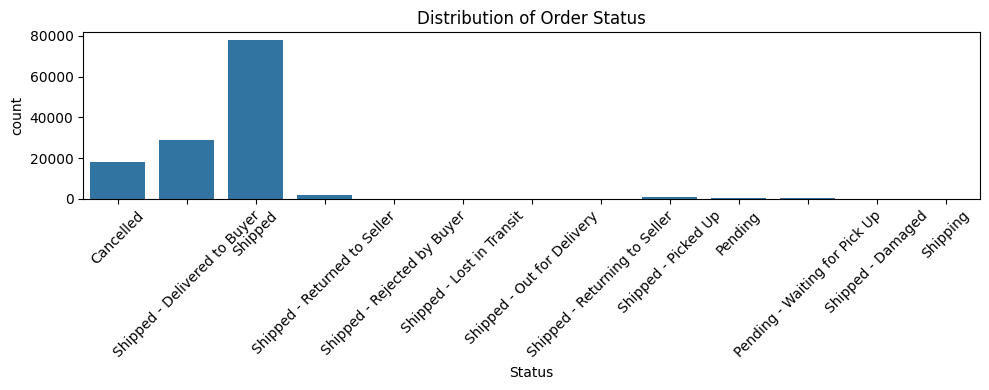

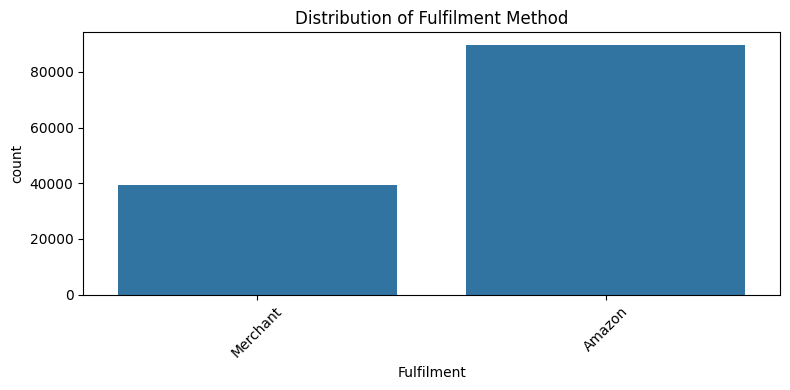

In [93]:
df['Status'].value_counts()
plt.figure(figsize=(10, 4))
sns.countplot(x='Status', data=df)
plt.title('Distribution of Order Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Biểu đồ phân bố Fulfilment
plt.figure(figsize=(8, 4))
sns.countplot(x='Fulfilment', data=df)
plt.title('Distribution of Fulfilment Method')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Phân bố của `Status` và `Fulfilment`**\
Amazon chịu trách nhiệm xử lí đơn hàng là chính\
Trạng thái đơn hàng đã shipped thành công chiếm nhiều nhất

Bây giờ ta sẽ tìm hiểu tiếp df_international - quan trọng trong việc phân tích 

In [94]:
df_international.loc[18635:]

,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
18635,SKU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18636,JNE3826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18637,JNE3827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18638,JNE3828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18639,JNE3853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
37427,AVIN,03-31-22,Mar-22,PJNE3423,PJNE3423-KR-4XL,1.00,537.50,538.00,4.00
37428,AVIN,03-31-22,Mar-22,PJNE3404,PJNE3404-KR-4XL,1.00,500.00,500.00,5.00
37429,AVIN,03-31-22,Mar-22,PJNE3423,PJNE3423-KR-4XL,1.00,537.50,538.00,4.00
37430,AVIN,03-31-22,Mar-22,SET290,SET290-KR-DPT-M,1.00,812.50,812.00,7.00


In [95]:
df_international.loc[19675:]

,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
19675,CUSTOMER,DATE,Months,Style,SKU,PCS,RATE,GROSS AMT,Stock
19676,REVATHY LOGANATHAN,06-05-21,Jun-21,MEN5004,MEN5004-KR-L,1.00,616.56,617.00,8.00
19677,REVATHY LOGANATHAN,06-05-21,Jun-21,MEN5004,MEN5004-KR-XL,1.00,616.56,617.00,4.00
19678,REVATHY LOGANATHAN,06-05-21,Jun-21,MEN5004,MEN5004-KR-XXL,1.00,616.56,617.00,6.00
19679,REVATHY LOGANATHAN,06-05-21,Jun-21,MEN5009,MEN5009-KR-L,1.00,616.56,617.00,6.00
...,...,...,...,...,...,...,...,...,...
37427,AVIN,03-31-22,Mar-22,PJNE3423,PJNE3423-KR-4XL,1.00,537.50,538.00,4.00
37428,AVIN,03-31-22,Mar-22,PJNE3404,PJNE3404-KR-4XL,1.00,500.00,500.00,5.00
37429,AVIN,03-31-22,Mar-22,PJNE3423,PJNE3423-KR-4XL,1.00,537.50,538.00,4.00
37430,AVIN,03-31-22,Mar-22,SET290,SET290-KR-DPT-M,1.00,812.50,812.00,7.00


Trong quá trình khám phá dữ liệu (EDA), tôi nhận thấy rằng từ dòng thứ 18635 trở đi trong file International Sale Report.csv có các dấu hiệu bất thường:\
	•	Tại dòng 18635 trở đi, dữ liệu chỉ có một cột SKU, các cột còn lại bị trống hoàn toàn.\
	•	Từ dòng 19675, file xuất hiện lại header (tên cột) lần nữa: CUSTOMER, DATE, Months, Style, SKU, PCS, RATE, GROSS AMT, Stock — điều này cho thấy đây là dữ liệu bị gộp lại từ một file khác hoặc một phần bị dán lại nhầm.\
	•	Ngoài ra, tôi quan sát thấy phần dữ liệu này bắt đầu lại từ ngày 06-05-21, trùng với phần dữ liệu trước đó (bắt đầu từ dòng 0), cho thấy đây là phần dữ liệu bị trùng lặp.\

Hành động xử lý: Tôi sẽ chỉ giữ lại các dòng từ 0 đến 18634 và lưu vào một DataFrame mới df_international_1 để tiếp tục phân tích.

In [96]:
df_international = df_international.loc[:18634].reset_index(drop=True)

df_international

,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
0,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.00,616.56,617.00
1,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.00,616.56,617.00
2,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.00,616.56,617.00
3,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.00,616.56,617.00
4,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.00,616.56,617.00
...,...,...,...,...,...,...,...,...,...
18630,04-30-22,Apr-22,Rino Sandaran,J0280,NaN,S,1.00,1812.50,1812.50
18631,04-30-22,Apr-22,Rino Sandaran,SET350,NaN,M,1.00,1512.50,1512.50
18632,04-30-22,Apr-22,Rino Sandaran,SET350,NaN,L,1.00,1512.50,1512.50
18633,04-30-22,Apr-22,Rino Sandaran,J0242,NaN,XXXL,1.00,1312.50,1312.50


In [97]:
print(df_international.info())
print(df_international.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18635 entries, 0 to 18634
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DATE       18635 non-null  object
 1   Months     18635 non-null  object
 2   CUSTOMER   18635 non-null  object
 3   Style      18635 non-null  object
 4   SKU        17218 non-null  object
 5   Size       18635 non-null  object
 6   PCS        18635 non-null  object
 7   RATE       18635 non-null  object
 8   GROSS AMT  18635 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB
None
            DATE  Months             CUSTOMER    Style             SKU   Size  \
count      18635   18635                18635    18635           17218  18635   
unique       162      12                  161     1056            4590     19   
top     09-14-21  Feb-22  MULBERRIES BOUTIQUE  JNE3555  SET268-KR-NP-L      L   
freq         700    3380                 2121      152              31   3638   

          PC

Kiểu dữ liệu đang bị sai

In [98]:
df_international['DATE'] = pd.to_datetime(df_international['DATE'], format='%m-%d-%y')
df_international['RATE'] = pd.to_numeric(df_international['RATE'], errors='coerce')
df_international['GROSS AMT'] = pd.to_numeric(df_international['GROSS AMT'], errors='coerce')
df_international['PCS'] = pd.to_numeric(df_international['PCS'], errors='coerce')

print(df_international['DATE'].min())
print(df_international['DATE'].max())


2021-06-05 00:00:00
2022-05-11 00:00:00


In [99]:
df_international.isnull().sum()

DATE            0
Months          0
CUSTOMER        0
Style           0
SKU          1417
Size            0
PCS             0
RATE            0
GROSS AMT       0
dtype: int64

<Axes: xlabel='PCS', ylabel='count'>

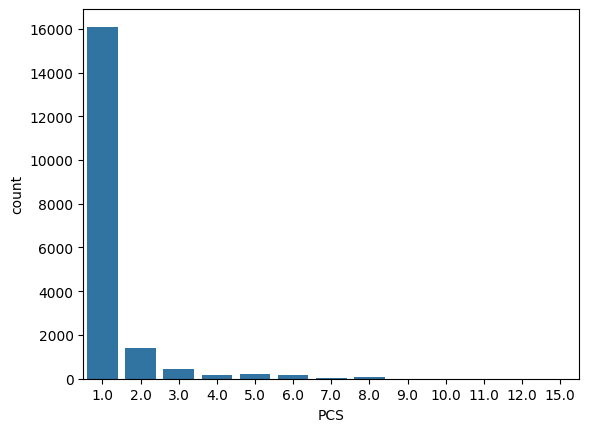

In [100]:
sns.countplot(data=df_international, x='PCS')

Đa số các đơn hàng quốc tế chỉ đặt 1 món trong 1 đơn, số ít các đơn gồm 10 món trở lên 

<Axes: xlabel='RATE'>

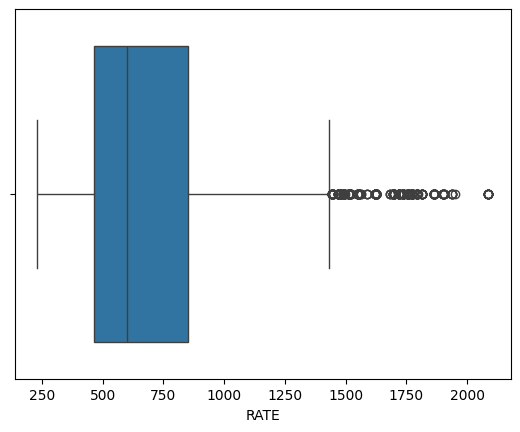

In [101]:
sns.boxplot(x=df_international['RATE'])

•	Dải giá trị chính (IQR): Tập trung chủ yếu dưới khoảng 1000.\
•	Outliers (giá trị ngoại lai): Có nhiều giá trị nằm xa bên phải (rất cao), thậm chí lên đến gần 10,000.\
•	Phân bố lệch phải (right-skewed): Do hầu hết các điểm dữ liệu nằm ở vùng thấp và có một số giá trị rất lớn kéo dài về phía bên phải.\

Việc có nhiều sản phẩm giá rẻ là bình thường, nhưng một số sản phẩm đặc biệt hoặc lỗi giá (ví dụ nhập nhầm đơn vị, hoặc đơn hàng đặc biệt) sẽ tạo ra outliers.

<Axes: xlabel='GROSS AMT'>

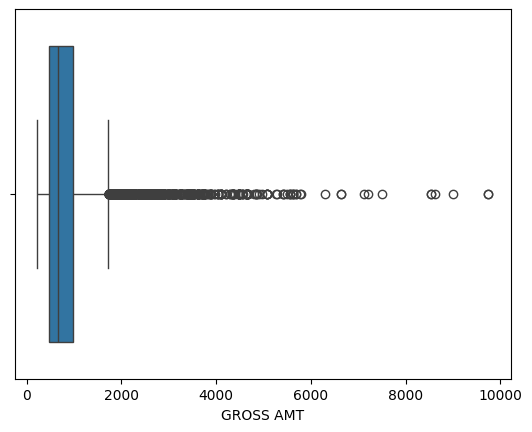

In [102]:
sns.boxplot(x=df_international['GROSS AMT'])

Tương tự RATE, GROSS AMT cũng có:\
•	Phân bố tập trung dưới khoảng 2000.\
•	Outliers rất lớn (đến gần 10,000).\
•	Skewed right rõ rệt.\

GROSS AMT = RATE * PCS → Do đó việc GROSS AMT có cùng xu hướng với RATE là hợp lý.

<Axes: xlabel='Month'>

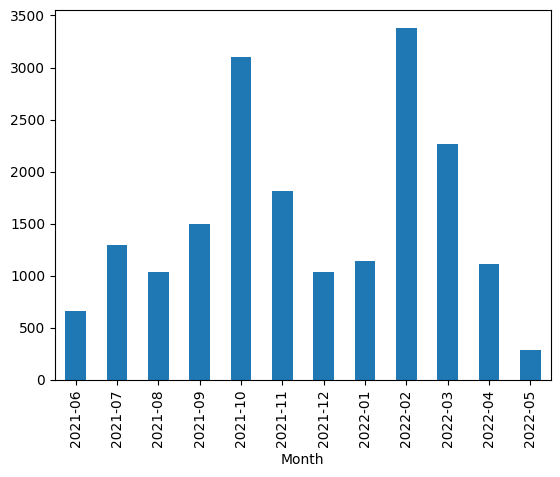

In [103]:
df_international['Month'] = df_international['DATE'].dt.to_period('M')
df_international['Month'].value_counts().sort_index().plot(kind='bar')

 Xu hướng chung:\
•	Tăng dần từ tháng 6/2021 đến tháng 10/2021, đạt đỉnh nhỏ đầu tiên (~3.100 đơn).\
•	Sau đó giảm nhẹ và tăng vọt vào tháng 2/2022, với mức cao nhất (~3.400 đơn).\
•	Sau tháng 3/2022 bắt đầu giảm mạnh, đặc biệt là tháng 5/2022 chỉ còn ~300 đơn.

In [104]:
print(df_international.groupby('CUSTOMER')['GROSS AMT'].sum().sort_values(ascending=False).head(10))

print(df_international['Size'].unique())

CUSTOMER
MULBERRIES BOUTIQUE                   2094070.5
AMANI CONCEPT TRADING LLC (KAPDA)      930451.0
VAHARSHA BOUTIQUE                      527214.0
GALAXY GROUP OF COMPANIES PVT. LTD     445058.0
RIVAAN LLC                             443042.0
SURE FASHIONS LLC                      403253.0
BHANU SALEINE NAUNITHAM                356998.0
COTTON CLOSET LTD                      345265.0
VISHA DEVAN                            321028.0
NIRUSAH TAILORING                      316470.0
Name: GROSS AMT, dtype: float64
['L' 'XL' 'XXL' 'S' 'M' 'Free' 'XS' 'XXXL' '5XL' '6XL' '4XL' 'FREE'
 'S TO XXL' 's' 'm' 'l' 'xl' 'xxl' 'xxxl']


•	MULBERRIES BOUTIQUE vượt trội hoàn toàn so với phần còn lại — có thể là đối tác quan trọng hoặc khách hàng VIP.\
•	Nhóm top 5 khách này chiếm phần lớn tổng doanh thu => nên ưu tiên phân tích sâu hơn (theo thời gian, size, sản phẩm…).\

Có nhiều giá trị trùng nghĩa nhưng khác định dạng, ví dụ:\
•	‘L’ và ‘l’\
•	‘Free’ và ‘FREE’\
•	‘M’ và ‘m’\
•	‘XL’ và ‘xl’, v.v.\
•	Giá trị 'S TO XXL' là dạng size tập hợp — có thể đại diện cho set sản phẩm nhiều size hoặc pack.

In [105]:
# Chuẩn hóa cột Size
df_international['Size'] = df_international['Size'].str.upper().str.strip()

print(df_international['Size'].unique())

df_international['Size'].value_counts()

['L' 'XL' 'XXL' 'S' 'M' 'FREE' 'XS' 'XXXL' '5XL' '6XL' '4XL' 'S TO XXL']


Size
L           3642
M           3364
XL          3260
XXL         2688
S           2561
XXXL        1657
XS           879
FREE         249
5XL          117
6XL          109
4XL          100
S TO XXL       9
Name: count, dtype: int64

In [106]:
df_cw_comparison

,Shiprocket,Unnamed: 1,INCREFF
0,Heads,Price (Per Unit),Price (Per Unit)
1,Inbound (Fresh Stock and RTO),₹4.00,4
2,Outbound,₹7.00,11
3,Storage Fee/Cft,₹25.00,Rs 0.15/- Per Day
4,Customer Return with Detailed QC,₹6.00,15.5
5,(A) SCOPE OF WORK and STANDARD OPERATING PROCE...,NaN,NaN
6,Inward,Unloading,• Boxes counted and weighed. Data captured in ...
7,NaN,Validation,• GRN will be initiated against a valid PO doc...
8,NaN,QC,• No QC to be done (Outer Visual Inspection an...
9,NaN,GRN,• Scanning (Goods will have scannable EAN cod...


Dữ liệu gốc trong file `.csv` chứa nhiều dòng khác nhau, bao gồm cả bảng giá và phần mô tả quy trình hoạt động. Tuy nhiên, chỉ **4 dòng đầu tiên sau dòng tiêu đề** là có định dạng bảng rõ ràng, với cấu trúc ba cột nhất quán:\

**Heads**: Tên loại dịch vụ (ví dụ: Inbound, Outbound, Storage, Returns)\
**Shiprocket**: Giá dịch vụ tương ứng trên nền tảng Shiprocket\
**INCREFF**: Giá dịch vụ tương ứng trên nền tảng INCREFF\

Các dòng tiếp theo sau dòng thứ 4 là phần mô tả văn bản (không còn cột giá hay tên dịch vụ cố định), nên không thể phân tích như một bảng giá được nữa.\

Do đó, **chỉ các dòng 1–4** (sau khi loại bỏ dòng tiêu đề lặp) mới thực sự đại diện cho một bảng giá hoàn chỉnh, có thể dễ dàng xử lý, so sánh hoặc trực quan hóa.

In [107]:
# Chỉ lấy 4 dòng đầu tiên (Inbound, Outbound, Storage Fee, Customer Return)
df_cw_comparison = df_cw_comparison.iloc[:5, :]

# Đặt lại tên cột chuẩn
df_cw_comparison.columns = ['Heads', 'Price per unit (Shiprocket)', 'Price per unit (INCREFF)']


In [108]:
df_cw_comparison = df_cw_comparison.drop(index=0).reset_index(drop=True)
df_cw_comparison

,Heads,Price per unit (Shiprocket),Price per unit (INCREFF)
0,Inbound (Fresh Stock and RTO),₹4.00,4
1,Outbound,₹7.00,11
2,Storage Fee/Cft,₹25.00,Rs 0.15/- Per Day
3,Customer Return with Detailed QC,₹6.00,15.5


In [109]:
# Bỏ ký hiệu tiền và chuyển đổi về kiểu số
df_cw_comparison['Price per unit (Shiprocket)'] = df_cw_comparison['Price per unit (Shiprocket)'].str.replace('₹', '').astype(float)
df_cw_comparison['Price per unit (INCREFF)'] = df_cw_comparison['Price per unit (INCREFF)'].str.replace('Rs', '').str.replace('/- Per Day', '').astype(float)
df_cw_comparison

,Heads,Price per unit (Shiprocket),Price per unit (INCREFF)
0,Inbound (Fresh Stock and RTO),4.0,4.00
1,Outbound,7.0,11.00
2,Storage Fee/Cft,25.0,0.15
3,Customer Return with Detailed QC,6.0,15.50


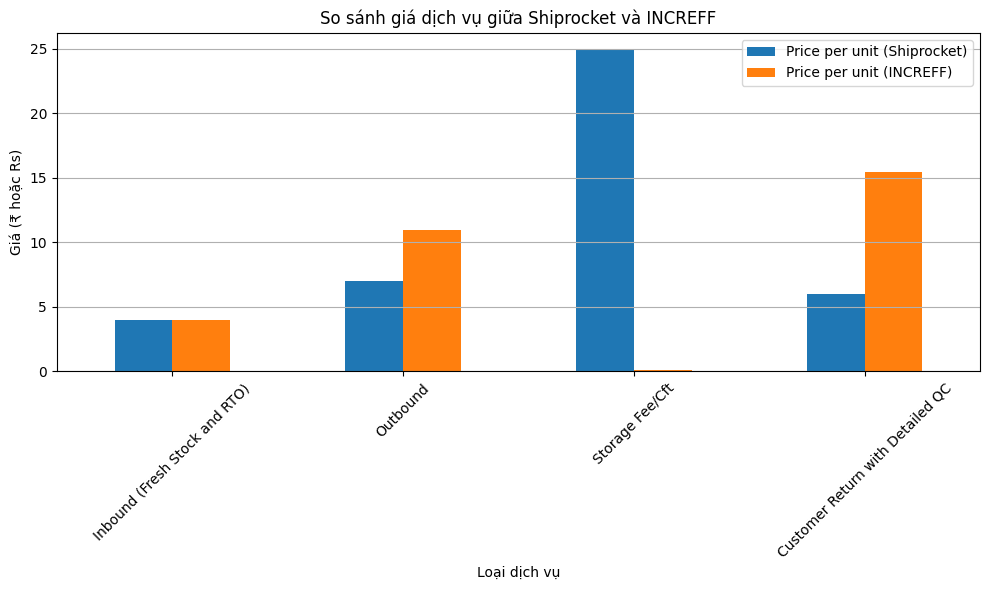

In [110]:
df_cw_comparison.plot(x='Heads', kind='bar', figsize=(10,6), rot=45)
plt.title("So sánh giá dịch vụ giữa Shiprocket và INCREFF")
plt.ylabel("Giá (₹ hoặc Rs)")
plt.xlabel("Loại dịch vụ")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [111]:
df_pl_march2021

,Sku,Style Id,Catalog,Category,Weight,TP 1,TP 2,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,Os326_M,Os326,Mix,Kurta,0.3,467,378.27,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995
1326,Os326_L,Os326,Mix,Kurta,0.3,467,378.27,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995
1327,Os326_XL,Os326,Mix,Kurta,0.3,467,378.27,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995
1328,Os326_2XL,Os326,Mix,Kurta,0.3,467,378.27,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995


In [112]:
df_pl_may2022

,Sku,Style Id,Catalog,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,Os326_M,Os326,Mix,Kurta,0.3,467,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995
1326,Os326_L,Os326,Mix,Kurta,0.3,467,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995
1327,Os326_XL,Os326,Mix,Kurta,0.3,467,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995
1328,Os326_2XL,Os326,Mix,Kurta,0.3,467,1878,1995,1995,1995,1995,1995,1995,1995,1995,1995


In [113]:
print(df_pl_march2021.isnull().sum()) 


Sku               0
Style Id          0
Catalog           0
Category          0
Weight            0
TP 1              0
TP 2              0
MRP Old           0
Final MRP Old     0
Ajio MRP          0
Amazon MRP        0
Amazon FBA MRP    0
Flipkart MRP      0
Limeroad MRP      0
Myntra MRP        0
Paytm MRP         0
Snapdeal MRP      0
dtype: int64


In [114]:
print(df_pl_may2022.isnull().sum()) 


Sku               0
Style Id          0
Catalog           0
Category          0
Weight            0
TP                0
MRP Old           0
Final MRP Old     0
Ajio MRP          0
Amazon MRP        0
Amazon FBA MRP    0
Flipkart MRP      0
Limeroad MRP      0
Myntra MRP        0
Paytm MRP         0
Snapdeal MRP      0
dtype: int64


***Preprocessing***

In [115]:
df_amazon_sale

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [116]:
# 1. Đổi định dạng ngày
df_amazon_sale['Date'] = pd.to_datetime(df_amazon_sale['Date'], errors='coerce')

# 2. Đổi ship-postal-code về dạng string
df_amazon_sale['ship-postal-code'] = df_amazon_sale['ship-postal-code'].astype('Int64').astype(str)

# 3. Xóa các cột không cần thiết
df_amazon_sale.drop(columns=['promotion-ids', 'Unnamed: 22'], inplace=True)

# 4. Kiểm tra giá trị null còn lại
df_amazon_sale

/var/folders/06/55ncynjj69l30_gnnsnw6xv40000gn/T/ipykernel_98777/1721185631.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_amazon_sale['Date'] = pd.to_datetime(df_amazon_sale['Date'], errors='coerce')


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True,NaN
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013,IN,False,NaN
128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004,IN,False,NaN
128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049,IN,False,NaN
128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,Shipped,1,INR,1199.00,Halol,Gujarat,389350,IN,False,NaN


In [117]:
null_counts = df_amazon_sale.isnull().sum()
null_percent = (null_counts / len(df_amazon_sale)) * 100

null_df = pd.DataFrame({
    'Missing Values': null_counts,
    'Percentage (%)': null_percent.round(2)
})

print(null_df[null_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False))

                Missing Values  Percentage (%)
fulfilled-by             89698           69.55
currency                  7795            6.04
Amount                    7795            6.04
Courier Status            6872            5.33
ship-city                   33            0.03
ship-state                  33            0.03
ship-country                33            0.03


In [118]:
# Drop cột không quan trọng và thiếu quá nhiều
df_amazon_sale.drop(columns=['fulfilled-by'], inplace=True)

# Điền Courier Status là 'Unknown'
df_amazon_sale['Courier Status'] = df_amazon_sale['Courier Status'].fillna('Unknown')

# Drop dòng thiếu thông tin địa chỉ ship
df_amazon_sale.dropna(subset=['ship-city', 'ship-state', 'ship-country'], inplace=True)

### 🧹 Xử lý Missing Values trong `df_amazon_sale`

Trong bước này, chúng tôi xử lý các giá trị bị thiếu (null) trong dataframe để đảm bảo dữ liệu sạch và sẵn sàng cho phân tích. Cụ thể:

1. **Xoá cột `fulfilled-by`**:
   - Cột này bị thiếu đến 69.55% dữ liệu, và không cần thiết cho phân tích doanh thu.
   - => Drop hoàn toàn cột này để tránh gây nhiễu. (dùng cột `Fulfillment` để phân tích chính)

2. **Xử lý cột `Amount` và `currency`**:
   - Đây là hai cột quan trọng cho việc tính doanh thu.
   - Tuy nhiên chỉ thiếu khoảng 6% dữ liệu, nên sẽ xem xét tiếp cả hai cột này cùng với cột `Qty` để đảm bảo tính chính xác cho phân tích doanh thu.

3. **Xử lý cột `Courier Status`**:
   - Thiếu khoảng 5.33% dữ liệu, nhưng có thể sử dụng được bằng cách **điền mặc định giá trị `'Unknown'`** cho các dòng bị thiếu.
   - Việc này giúp tránh mất dữ liệu trong các phân tích nhóm (groupby) sau này.

4. **Xử lý các cột địa chỉ giao hàng (`ship-city`, `ship-state`, `ship-country`)**:
   - Các cột này chỉ thiếu khoảng 0.03% dữ liệu.
   - **xoá luôn các dòng bị thiếu** vì số lượng rất nhỏ, không ảnh hưởng đáng kể tới toàn bộ tập dữ liệu.

In [119]:
# Lọc các hàng thiếu currency và Amount, và Qty == 0
rows_to_drop = df_amazon_sale[
    df_amazon_sale['currency'].isnull() &
    df_amazon_sale['Amount'].isnull() &
    (df_amazon_sale['Qty'] == 0)
]
print("Các hàng sẽ bị drop: (vì Qty = 0 thì sẽ không có đơn hàng)")
rows_to_drop

Các hàng sẽ bị drop: (vì Qty = 0 thì sẽ không có đơn hàng)


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,Cancelled,0,NaN,NaN,HYDERABAD,TELANGANA,500008,IN,False
29,404-5933402-8801952,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,3XL,B07JG3CND8,Unknown,0,NaN,NaN,GUWAHATI,ASSAM,781003,IN,False
65,171-4137548-0481151,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,JNE3373,JNE3373-KR-XXL,kurta,XXL,B082W8RWN1,Cancelled,0,NaN,NaN,Dahod,Gujarat,389151,IN,False
84,403-9950518-0349133,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,M,B08WPR5MCB,Cancelled,0,NaN,NaN,HYDERABAD,TELANGANA,500072,IN,False
95,405-9112089-3379536,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,JNE3405,JNE3405-KR-L,kurta,L,B081WSCKPQ,Cancelled,0,NaN,NaN,PUNE,MAHARASHTRA,411046,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128903,406-3923120-4345139,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,JNE3801,JNE3801-KR-M,kurta,M,B09SDZ4FH9,Cancelled,0,NaN,NaN,ANANTAPUR,ANDHRA PRADESH,515001,IN,False
128907,403-6757403-6097100,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,NW014,NW014-ST-SR-XXXL,Set,3XL,B0928ZT74Y,Cancelled,0,NaN,NaN,GREATER NOIDA,UTTAR PRADESH,201306,IN,False
128908,403-6757403-6097100,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,NW007,NW007-ST-CP-XXXL,Set,3XL,B0928YCMQP,Cancelled,0,NaN,NaN,GREATER NOIDA,UTTAR PRADESH,201306,IN,False
128958,408-9513596-4393945,2022-05-31,Cancelled,Amazon,Amazon.in,Expedited,SET058,SET058-KR-NP-L,Set,L,B07R487XRD,Cancelled,0,NaN,NaN,Bengaluru,KARNATAKA,560037,IN,False


In [120]:
# Lọc các hàng có Qty > 0 nhưng bị thiếu currency hoặc Amount
rows_to_impute = df_amazon_sale[
    (df_amazon_sale['Qty'] > 0) &
    (df_amazon_sale['currency'].isnull() | df_amazon_sale['Amount'].isnull())
]
print("\nCác hàng có thể được xử lý bằng điền khuyết:")
rows_to_impute


Các hàng có thể được xử lý bằng điền khuyết:


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
937,S02-5278980-4327051,2022-04-30,Shipped,Amazon,Non-Amazon,Standard,BL017,BL017-63BLACK,Blouse,Free,B077Z7WDXN,Unshipped,15,NaN,NaN,Surat,Gujarat,394210,IN,False
1057,S02-9107114-0460608,2022-04-30,Shipped,Amazon,Non-Amazon,Standard,SET315,SET315-KR-PP-XL,Set,XL,B09RKDN6S4,Unshipped,2,NaN,NaN,Surat,Gujarat,394210,IN,False
3631,S02-1006261-5356758,2022-04-28,Shipped,Amazon,Non-Amazon,Standard,JNE2305,JNE2305-KR-533-L,kurta,L,B07GRSCXCP,Unshipped,9,NaN,NaN,Surat,Gujarat,394210,IN,False
3632,S02-3681731-6111841,2022-04-28,Shipped,Amazon,Non-Amazon,Standard,JNE2058,JNE2058-KR-339-L,kurta,L,B075ZTMFJX,Unshipped,1,NaN,NaN,Surat,Gujarat,394210,IN,False
3634,S02-1926028-4838217,2022-04-28,Shipped,Amazon,Non-Amazon,Standard,JNE3311,JNE3311-KR-A-XS,kurta,XS,B07XJ15Q1S,Unshipped,1,NaN,NaN,Surat,Gujarat,394210,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118099,S02-9176732-4357939,2022-06-08,Shipped,Amazon,Non-Amazon,Standard,J0014,J0014-LCD-M,Set,M,B0894XW4QF,Unshipped,1,NaN,NaN,Surat,Gujarat,394210,IN,False
124616,S02-2059602-9568060,2022-06-04,Shipped,Amazon,Non-Amazon,Standard,JNE3577,JNE3577-KR-S,kurta,S,B08MYV4CHS,Unshipped,1,NaN,NaN,Surat,Gujarat,394210,IN,False
124617,S02-3811761-8377519,2022-06-04,Shipped,Amazon,Non-Amazon,Standard,J0103,J0103-SKD-XS,Set,XS,B08VWKSVV7,Unshipped,2,NaN,NaN,Surat,Gujarat,394210,IN,False
124619,S02-5216693-3162561,2022-06-04,Shipped,Amazon,Non-Amazon,Standard,SET154,SET154-KR-NP-XXL,Set,XXL,B082PXQ5BL,Unshipped,1,NaN,NaN,Surat,Gujarat,394210,IN,False


In [121]:
# Drop các hàng này
df_amazon_sale.drop(index=rows_to_drop.index, inplace=True)

df_amazon_sale

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013,IN,False
128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004,IN,False
128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049,IN,False
128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,INR,1199.00,Halol,Gujarat,389350,IN,False


In [122]:
df_amazon_sale.isnull().sum() 

Order ID                0
Date                    0
Status                  0
Fulfilment              0
Sales Channel           0
ship-service-level      0
Style                   0
SKU                     0
Category                0
Size                    0
ASIN                    0
Courier Status          0
Qty                     0
currency              124
Amount                124
ship-city               0
ship-state              0
ship-postal-code        0
ship-country            0
B2B                     0
dtype: int64

Sau khi xử lí thì còn 124 dòng NULL của `currency` và `Amount` trên tổng số 121273 dòng, chỉ chiếm khoảng 0.1%

=> Drop luôn các dòng này

In [123]:
# Drop các hàng còn thiếu Amount hoặc currency
df_amazon_sale = df_amazon_sale.dropna(subset=['Amount', 'currency'])

print(df_amazon_sale.shape)

df_amazon_sale

(121149, 20)


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013,IN,False
128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004,IN,False
128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049,IN,False
128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,INR,1199.00,Halol,Gujarat,389350,IN,False


In [124]:
df_amazon_sale[(df_amazon_sale['Qty'] == 0) & (df_amazon_sale['Amount'] > 0)]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,Unknown,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,Unknown,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False
23,404-6019946-2909948,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET291,SET291-KR-PP-M,Set,M,B099NK55YG,Unknown,0,INR,570.48,pune,MAHARASHTRA,411044,IN,False
83,404-6522553-9345930,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET377,SET377-KR-NP-M,Set,M,B09TZV23QS,Unknown,0,INR,1105.36,DEHRADUN,UTTARAKHAND,248001,IN,False
178,171-1224053-5752314,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0344,J0344-TP-L,Top,L,B0986XYFFP,Unknown,0,INR,463.81,BENGALURU,KARNATAKA,560087,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128730,403-2139190-8481165,2022-06-01,Cancelled,Merchant,Amazon.in,Standard,JNE3797,JNE3797-KR-XL,Western Dress,XL,B09SDXRYBG,Unknown,0,INR,700.00,Barabanki,UTTAR PRADESH,225001,IN,False
128761,402-4651401-6366769,2022-06-01,Cancelled,Merchant,Amazon.in,Standard,JNE3687,JNE3687-TU-S,Top,S,B0986XYZ4L,Unknown,0,INR,519.05,BENGALURU,KARNATAKA,560043,IN,False
128762,402-4651401-6366769,2022-06-01,Cancelled,Merchant,Amazon.in,Standard,J0184,J0184-KR-A-S,kurta,S,B08V151HB2,Unknown,0,INR,385.71,BENGALURU,KARNATAKA,560043,IN,False
128875,403-9524128-9243508,2022-06-01,Cancelled,Merchant,Amazon.in,Standard,JNE3797,JNE3797-KR-XL,Western Dress,XL,B09SDXRYBG,Unknown,0,INR,734.29,Barabanki,UTTAR PRADESH,225001,IN,False


Điều này là bất hợp lí vì `Qty` = 0 thì `Amount` không thể lớn hơn 0 được

In [125]:
df_amazon_sale = df_amazon_sale[~((df_amazon_sale['Qty'] == 0) & (df_amazon_sale['Amount'] > 0))]

df_amazon_sale

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085,IN,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210,IN,True
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073,IN,False
5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102,IN,False
6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,B08CMHNWBN,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500013,IN,False
128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,INR,999.0,GURUGRAM,HARYANA,122004,IN,False
128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,INR,690.0,HYDERABAD,TELANGANA,500049,IN,False
128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,INR,1199.0,Halol,Gujarat,389350,IN,False


In [126]:
df_amazon_sale['Unit_Price'] = df_amazon_sale['Amount'] / df_amazon_sale['Qty']

/var/folders/06/55ncynjj69l30_gnnsnw6xv40000gn/T/ipykernel_98777/3670101508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amazon_sale['Unit_Price'] = df_amazon_sale['Amount'] / df_amazon_sale['Qty']


In [127]:
Q1 = df_amazon_sale['Unit_Price'].quantile(0.25)
Q3 = df_amazon_sale['Unit_Price'].quantile(0.75)
IQR = Q3 - Q1

# Xác định ngưỡng
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc các outlier
outliers = df_amazon_sale[(df_amazon_sale['Unit_Price'] < lower_bound) |
                          (df_amazon_sale['Unit_Price'] > upper_bound)]

outliers 

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Unit_Price
102,408-7698765-2294756,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET277,SET277-KR-NP-XXL,Set,XXL,...,Shipped,1,INR,1338.0,AMBARNATH,MAHARASHTRA,421502,IN,False,1338.0
146,171-0131752-2560336,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,SET355,SET355-KR-PP-M,Set,M,...,Shipped,1,INR,1399.0,BARABANKI,UTTAR PRADESH,225001,IN,False,1399.0
243,408-2759943-9849959,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET363,SET363-KR-NP-XXL,Set,XXL,...,Shipped,1,INR,1338.0,KOLKATA,WEST BENGAL,700051,IN,False,1338.0
299,404-7491342-1035558,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0280,J0280-SKD-S,Set,S,...,Shipped,1,INR,1463.0,THANE,MAHARASHTRA,401107,IN,False,1463.0
349,171-3537751-4007556,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET436,SET436-KR-NP-XXXL,Set,3XL,...,Shipped,1,INR,1999.0,Nellore,ANDHRA PRADESH,524314,IN,False,1999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128811,404-8080630-3948329,2022-06-01,Shipped,Amazon,Amazon.in,Expedited,PSET268,PSET268-KR-NP-5XL,Set,5XL,...,Shipped,1,INR,1399.0,Gurgaon,HARYANA,122001,IN,False,1399.0
128846,407-3299391-4191514,2022-06-01,Cancelled,Amazon,Amazon.in,Expedited,J0277,J0277-SKD-M,Set,M,...,Unshipped,1,INR,1364.0,Hyderabad,TELANGANA,500081,IN,False,1364.0
128873,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0079,J0079-SKD-S,Set,S,...,Shipped,1,INR,1523.0,ALLUR,ANDHRA PRADESH,524315,IN,False,1523.0
128911,171-2686043-8605144,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-XL,Set,XL,...,Shipped,1,INR,1349.0,PUNE,MAHARASHTRA,411002,IN,False,1349.0


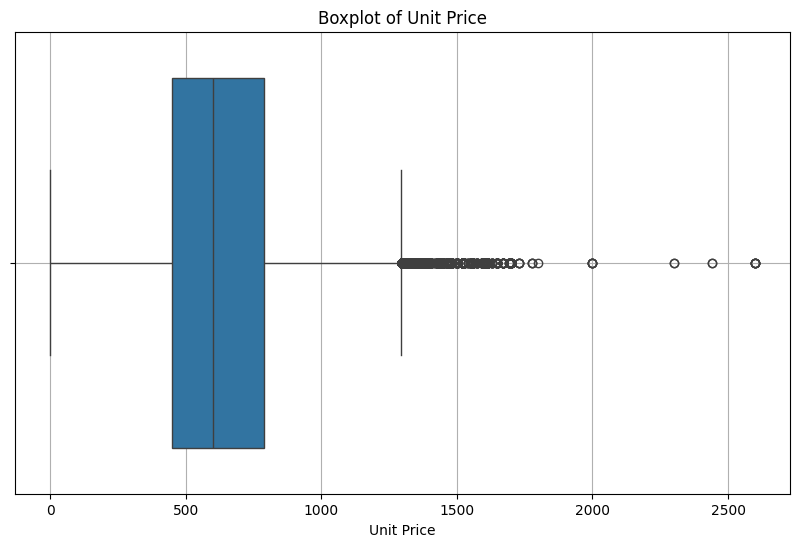

In [128]:

# Vẽ boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_amazon_sale['Unit_Price'])
plt.title('Boxplot of Unit Price')
plt.xlabel('Unit Price')
plt.grid(True)
plt.show()

In [129]:
percent_outliers = len(outliers) / len(df_amazon_sale) * 100
print(f"Số lượng outliers: {len(outliers)}")
print(f"Phần trăm outliers: {percent_outliers:.2f}%")

Số lượng outliers: 3407
Phần trăm outliers: 2.94%


In [130]:
# Thay thế outliers bằng upper bound
df_amazon_sale['Unit_Price'] = df_amazon_sale['Unit_Price'].clip(upper=upper_bound)

/var/folders/06/55ncynjj69l30_gnnsnw6xv40000gn/T/ipykernel_98777/1990861705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amazon_sale['Unit_Price'] = df_amazon_sale['Unit_Price'].clip(upper=upper_bound)


In [152]:
df_amazon_sale['Amount_Recomputed'] = df_amazon_sale['Unit_Price'] * df_amazon_sale['Qty']

# Tính IQR để xác định outliers
Q1 = df_amazon_sale['Amount_Recomputed'].quantile(0.25)
Q3 = df_amazon_sale['Amount_Recomputed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Thay thế các outlier Amount bằng giá trị râu trên
df_amazon_sale.loc[df_amazon_sale['Amount_Recomputed'] > upper_bound, 'Amount_Recomputed'] = upper_bound
df_amazon_sale.loc[df_amazon_sale['Amount_Recomputed'] < lower_bound, 'Amount_Recomputed'] = lower_bound

# Gán lại vào cột Amount chính thức
df_amazon_sale['Amount'] = df_amazon_sale['Amount_Recomputed']

# Xóa cột trung gian nếu muốn
df_amazon_sale.drop(columns='Amount_Recomputed', inplace=True)

In [132]:
df_amazon_sale[df_amazon_sale.duplicated(keep=False)]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Unit_Price
85790,171-3249942-2207542,2022-05-03,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,XL,...,Shipped,1,INR,939.0,PUNE,MAHARASHTRA,411057,IN,False,939.0
85791,171-3249942-2207542,2022-05-03,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,XL,...,Shipped,1,INR,939.0,PUNE,MAHARASHTRA,411057,IN,False,939.0
86418,405-8669298-3850736,2022-05-03,Shipped,Amazon,Amazon.in,Expedited,MEN5025,MEN5025-KR-XXXL,kurta,3XL,...,Shipped,1,INR,533.0,GHAZIABAD,UTTAR PRADESH,201010,IN,False,533.0
86419,405-8669298-3850736,2022-05-03,Shipped,Amazon,Amazon.in,Expedited,MEN5025,MEN5025-KR-XXXL,kurta,3XL,...,Shipped,1,INR,533.0,GHAZIABAD,UTTAR PRADESH,201010,IN,False,533.0
98954,407-4853873-4978725,2022-06-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-M,Set,M,...,Shipped,1,INR,1163.0,Zirakpur,Punjab,140603,IN,False,1163.0
98955,407-4853873-4978725,2022-06-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-M,Set,M,...,Shipped,1,INR,1163.0,Zirakpur,Punjab,140603,IN,False,1163.0


In [133]:
df_amazon_sale = df_amazon_sale.drop_duplicates().reset_index(drop=True)

df_amazon_sale 

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Unit_Price
0,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085,IN,False,406.0
1,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210,IN,True,329.0
2,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073,IN,False,574.0
3,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,...,Shipped,1,INR,824.0,GHAZIABAD,UTTAR PRADESH,201102,IN,False,824.0
4,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,...,Shipped,1,INR,653.0,CHANDIGARH,CHANDIGARH,160036,IN,False,653.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116008,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500013,IN,False,517.0
116009,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,Shipped,1,INR,999.0,GURUGRAM,HARYANA,122004,IN,False,999.0
116010,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,Shipped,1,INR,690.0,HYDERABAD,TELANGANA,500049,IN,False,690.0
116011,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,Shipped,1,INR,1199.0,Halol,Gujarat,389350,IN,False,1199.0


In [134]:
df_international.isnull().sum() 

DATE            0
Months          0
CUSTOMER        0
Style           0
SKU          1417
Size            0
PCS             0
RATE            0
GROSS AMT       0
Month           0
dtype: int64

In [135]:
# Tạo lại SKU từ Style và Size (nếu Size không bị thiếu)
df_international['SKU_reconstructed'] = df_international.apply(
    lambda row: f"{row['Style']}-KR-{row['Size']}" if pd.notnull(row['Style']) and pd.notnull(row['Size']) else np.nan,
    axis=1
)

# Với những dòng SKU bị thiếu, điền bằng SKU_reconstructed
df_international['SKU'] = df_international['SKU'].fillna(df_international['SKU_reconstructed'])

# Drop cột trung gian nếu không cần
df_international.drop(columns=['SKU_reconstructed'], inplace=True)

In [136]:
df_international.isnull().sum() 

DATE         0
Months       0
CUSTOMER     0
Style        0
SKU          0
Size         0
PCS          0
RATE         0
GROSS AMT    0
Month        0
dtype: int64

In [137]:
df_international

,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT,Month
0,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.0,616.56,617.0,2021-06
1,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.0,616.56,617.0,2021-06
2,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.0,616.56,617.0,2021-06
3,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.0,616.56,617.0,2021-06
4,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.0,616.56,617.0,2021-06
...,...,...,...,...,...,...,...,...,...,...
18630,2022-04-30,Apr-22,Rino Sandaran,J0280,J0280-KR-S,S,1.0,1812.50,1812.5,2022-04
18631,2022-04-30,Apr-22,Rino Sandaran,SET350,SET350-KR-M,M,1.0,1512.50,1512.5,2022-04
18632,2022-04-30,Apr-22,Rino Sandaran,SET350,SET350-KR-L,L,1.0,1512.50,1512.5,2022-04
18633,2022-04-30,Apr-22,Rino Sandaran,J0242,J0242-KR-XXXL,XXXL,1.0,1312.50,1312.5,2022-04


In [138]:
print(df_international.duplicated().sum())

df_international_dup = df_international[df_international.duplicated(keep=False)]

df_international_dup 

6313


,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT,Month
145,2021-06-15,Jun-21,THANA NAGISSWARY L MARIMUTHU,JNE3710,JNE3710-DR-S,S,1.0,616.85,617.0,2021-06
147,2021-06-15,Jun-21,THANA NAGISSWARY L MARIMUTHU,J0037,J0037-KR-S,S,1.0,779.35,779.0,2021-06
149,2021-06-15,Jun-21,THANA NAGISSWARY L MARIMUTHU,JNE2100,JNE2100-KR-144-M,M,1.0,454.35,454.0,2021-06
153,2021-06-15,Jun-21,THANA NAGISSWARY L MARIMUTHU,J0239,J0239-SKD-M,M,1.0,1364.35,1364.0,2021-06
155,2021-06-15,Jun-21,THANA NAGISSWARY L MARIMUTHU,JNE3710,JNE3710-DR-S,S,1.0,616.85,617.0,2021-06
...,...,...,...,...,...,...,...,...,...,...
18442,2022-05-09,May-22,Lazy Daisy Co Ltd,J0399,J0399-KR-XS,XS,1.0,775.00,775.0,2022-05
18443,2022-05-09,May-22,Lazy Daisy Co Ltd,J0399,J0399-KR-S,S,1.0,775.00,775.0,2022-05
18444,2022-05-09,May-22,Lazy Daisy Co Ltd,J0399,J0399-KR-XS,XS,1.0,775.00,775.0,2022-05
18446,2022-05-09,May-22,Lazy Daisy Co Ltd,J0399,J0399-KR-S,S,1.0,775.00,775.0,2022-05


In [139]:
df_international = df_international.drop_duplicates().reset_index(drop=True)

df_international 

,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT,Month
0,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.0,616.56,617.0,2021-06
1,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.0,616.56,617.0,2021-06
2,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.0,616.56,617.0,2021-06
3,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.0,616.56,617.0,2021-06
4,2021-06-05,Jun-21,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.0,616.56,617.0,2021-06
...,...,...,...,...,...,...,...,...,...,...
12317,2022-04-30,Apr-22,Rino Sandaran,J0280,J0280-KR-S,S,1.0,1812.50,1812.5,2022-04
12318,2022-04-30,Apr-22,Rino Sandaran,SET350,SET350-KR-M,M,1.0,1512.50,1512.5,2022-04
12319,2022-04-30,Apr-22,Rino Sandaran,SET350,SET350-KR-L,L,1.0,1512.50,1512.5,2022-04
12320,2022-04-30,Apr-22,Rino Sandaran,J0242,J0242-KR-XXXL,XXXL,1.0,1312.50,1312.5,2022-04


In [140]:
Q1 = df_international['RATE'].quantile(0.25)
Q3 = df_international['RATE'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_international[(df_international['RATE'] < lower_bound) | 
                            (df_international['RATE'] > upper_bound)]
print(f"Số outliers: {len(outliers)}")
print(f"Phần trăm outliers: {len(outliers) / len(df_international) * 100:.2f}%")

Số outliers: 352
Phần trăm outliers: 2.86%


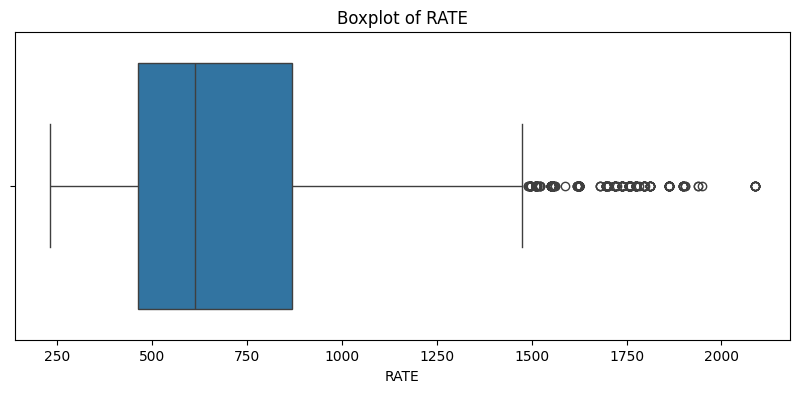

In [141]:
# Vẽ boxplot cho cột RATE
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_international, x='RATE')
plt.title('Boxplot of RATE')
plt.show()

In [142]:
# Thay thế outliers lớn hơn upper bound
df_international.loc[df_international['RATE'] > upper_bound, 'RATE'] = upper_bound

# Thay thế outliers nhỏ hơn lower bound
df_international.loc[df_international['RATE'] < lower_bound, 'RATE'] = lower_bound

outlier_mask = (df_international['RATE'] == upper_bound) | (df_international['RATE'] == lower_bound)

# 2. Tính lại GROSS AMT cho các dòng outlier đó với chiết khấu 3%
df_international.loc[outlier_mask, 'GROSS AMT'] = (
    df_international.loc[outlier_mask, 'RATE'] *
    df_international.loc[outlier_mask, 'PCS'] *
    (1 - 0.03)  # chiết khấu 3%
)

In [143]:
# Kiểm tra tỷ lệ khớp lại giữa RATE * PCS và GROSS AMT
check_ratio = df_international['GROSS AMT'] / (df_international['RATE'] * df_international['PCS'])
print(check_ratio.describe())

count    12322.000000
mean         0.979703
std          0.028505
min          0.879692
25%          0.960000
50%          1.000000
75%          1.000000
max          1.001481
dtype: float64


In [144]:
df_sale


,SKU Code,Design No.,Stock,Category,Size,Color
0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red
...,...,...,...,...,...,...
9266,NaN,NaN,NaN,NaN,NaN,NaN
9267,NaN,NaN,NaN,NaN,NaN,NaN
9268,NaN,NaN,NaN,NaN,NaN,NaN
9269,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
# Loại bỏ các dòng mà toàn bộ các giá trị đều là NaN
df_sale.dropna(how='all', inplace=True)

In [146]:
df_sale.isnull().sum() 

SKU Code      47
Design No.     0
Stock          0
Category       9
Size           0
Color          9
dtype: int64

In [147]:
df_sale = df_sale[df_sale['SKU Code'].notna()]

df_sale = df_sale[df_sale['Category'].notna() & df_sale['Color'].notna()]

df_sale.reset_index(drop=True, inplace=True)

df_sale 

,SKU Code,Design No.,Stock,Category,Size,Color
0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red
...,...,...,...,...,...,...
9183,SET462-KR-NP-S,SET462,44.0,SET,S,Teal
9184,SET462-KR-NP-XL,SET462,58.0,SET,XL,Teal
9185,SET462-KR-NP-XS,SET462,20.0,SET,XS,Teal
9186,SET462-KR-NP-XXL,SET462,66.0,SET,XXL,Teal


In [148]:
print(df_sale.duplicated().sum())

df_sale = df_sale.drop_duplicates().reset_index(drop=True)

df_sale 

3


,SKU Code,Design No.,Stock,Category,Size,Color
0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red
...,...,...,...,...,...,...
9180,SET462-KR-NP-S,SET462,44.0,SET,S,Teal
9181,SET462-KR-NP-XL,SET462,58.0,SET,XL,Teal
9182,SET462-KR-NP-XS,SET462,20.0,SET,XS,Teal
9183,SET462-KR-NP-XXL,SET462,66.0,SET,XXL,Teal


**Phan Tich Doanh Thu AMAZON**

In [149]:
df_amazon_sale.describe() 


,Date,Qty,Amount,Unit_Price
count,116013,116013.000000,116013.000000,116013.000000
mean,2022-05-12 14:18:46.611672576,1.003775,646.221324,643.966413
min,2022-03-31 00:00:00,1.000000,0.000000,0.000000
25%,2022-04-20 00:00:00,1.000000,449.000000,449.000000
50%,2022-05-10 00:00:00,1.000000,606.000000,599.000000
75%,2022-06-05 00:00:00,1.000000,788.000000,788.000000
max,2022-06-29 00:00:00,8.000000,5584.000000,1296.500000
std,NaN,0.072652,272.847687,268.593937


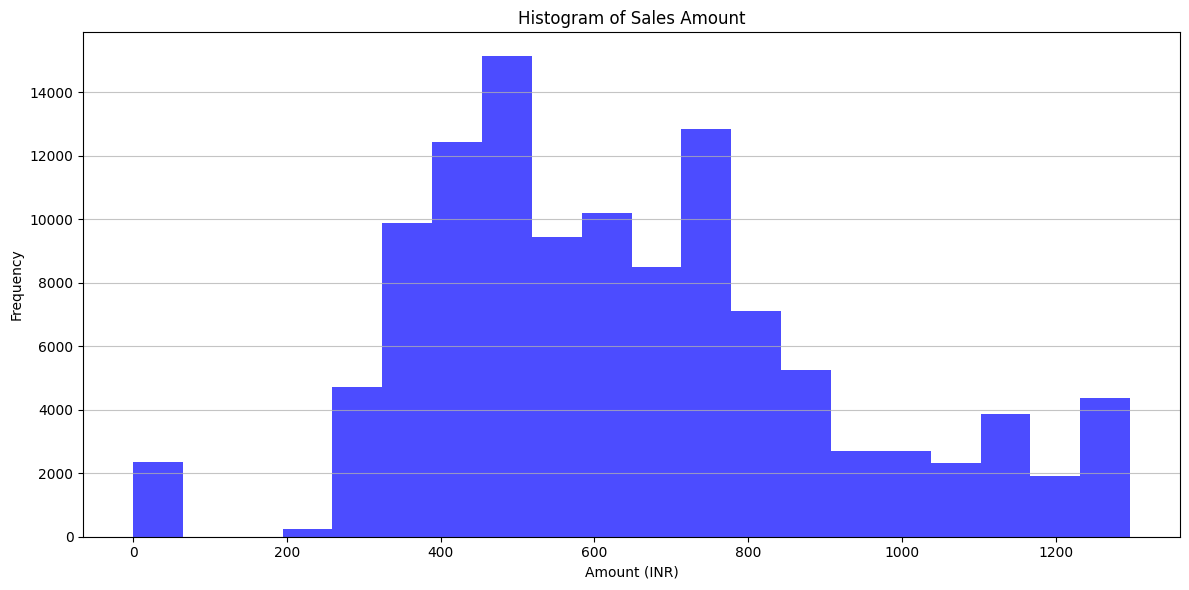

In [153]:
plt.figure(figsize=(12, 6))
plt.hist(df_amazon_sale['Amount'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Amount (INR)')
plt.ylabel('Frequency')
plt.title('Histogram of Sales Amount')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

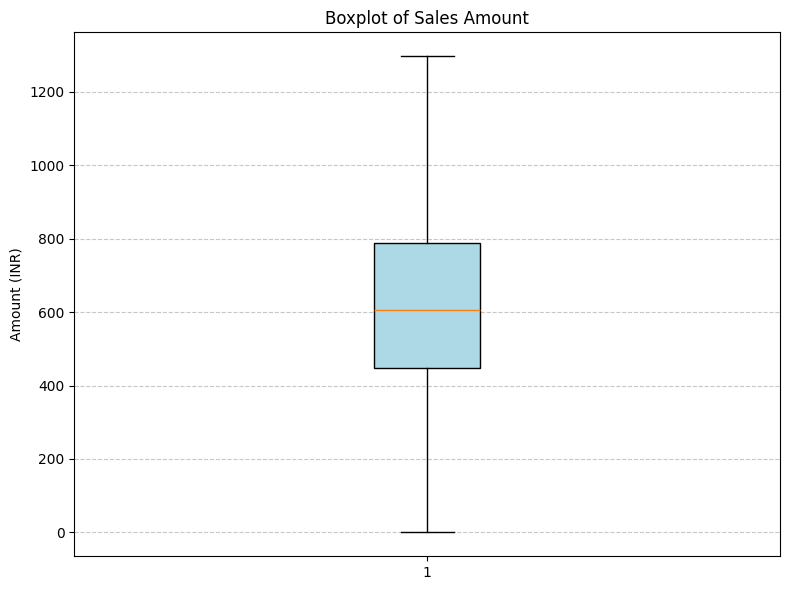

In [155]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_amazon_sale['Amount'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of Sales Amount')
plt.ylabel('Amount (INR)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [156]:
df_amazon_sale.to_csv('../data/processed/df_amazon_sale_clean.csv', index=False)
df_international.to_csv('../data/processed/df_international_clean.csv', index=False)